In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from PIL import Image
from IPython.core.display import HTML

from engine.utils import ProgramGenerator, ProgramInterpreter
from prompts.knowtag import PROMPT

c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
interpreter = ProgramInterpreter(dataset='okDet')

Registering FACEDET step


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Registering LIST step
Registering CLASSIFY step


c:\Users\HYUN\Anaconda3\envs\visprog\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering RESULT step
Registering TAG step
Registering LOC step


In [4]:
def create_prompt(instruction):
    return PROMPT.format(instruction=instruction,list_max=20)

generator = ProgramGenerator(prompter=create_prompt,
                             model="gpt-3.5-turbo-instruct")

In [13]:
image = Image.open('../assets/bollywood.png')
image.thumbnail((640,640),Image.ANTIALIAS)
init_state = dict(
    IMAGE=image.convert('RGB')
)

C:\Users\HYUN\AppData\Local\Temp\ipykernel_9968\1173536706.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((640,640),Image.ANTIALIAS)


In [16]:
instruction = "Tag these people from bollywood."

prog,_ = generator.generate(instruction)
print(prog)

OBJ0=FACEDET(image=IMAGE)
LIST0=LIST(query='people from bollywood',max=20)
OBJ1=CLASSIFY(image=IMAGE,object=OBJ0,categories=LIST0)
IMAGE0=TAG(image=IMAGE,object=OBJ1)
FINAL_RESULT=RESULT(var=IMAGE0)


FACEDET
LIST
CLASSIFY
TAG
RESULT
<PIL.Image.Image image mode=RGB size=640x462 at 0x236ED5EB3A0>



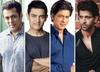
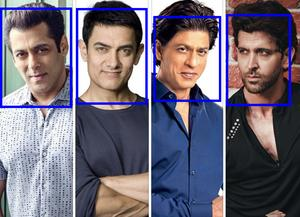
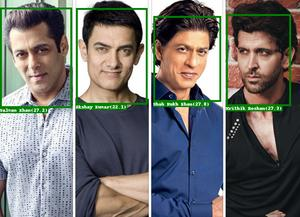
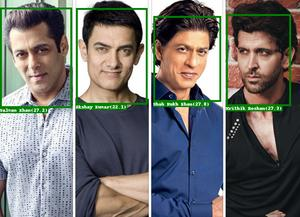

In [17]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

print(result)

HTML(html_str)